In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from skimage.color import rgb2gray, rgb2grey


import warnings

In [64]:
warnings.simplefilter('ignore')
plt.rcParams['figure.figsize'] = (16,9)
sns.set(style='whitegrid')

In [10]:
data = pd.read_csv('Musk1.csv', header=None)
data.columns = ['BagClass', 'BagId', *['Feature{}'.format(i) for i in range(1, 167)]]
labels, features = data.iloc[:, :2], data.iloc[:, 2:]

In [11]:
labels.head()

,BagClass,BagId
0,1,1
1,1,1
2,1,1
3,1,1
4,1,2


In [12]:
features.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature157,Feature158,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166
0,42,-198,-109,-75,-117,11,23,-88,-28,-27,...,-238,-74,-129,-120,-38,30,48,-37,6,30
1,42,-191,-142,-65,-117,55,49,-170,-45,5,...,-238,-302,60,-120,-39,31,48,-37,5,30
2,42,-191,-142,-75,-117,11,49,-161,-45,-28,...,-238,-73,-127,-120,-38,30,48,-37,5,31
3,42,-198,-110,-65,-117,55,23,-95,-28,5,...,-238,-302,60,-120,-39,30,48,-37,6,30
4,42,-198,-102,-75,-117,10,24,-87,-28,-28,...,-238,-73,-127,51,128,144,43,-30,14,26


In [15]:
data.head()

,BagClass,BagId,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,...,Feature157,Feature158,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166
0,1,1,42,-198,-109,-75,-117,11,23,-88,...,-238,-74,-129,-120,-38,30,48,-37,6,30
1,1,1,42,-191,-142,-65,-117,55,49,-170,...,-238,-302,60,-120,-39,31,48,-37,5,30
2,1,1,42,-191,-142,-75,-117,11,49,-161,...,-238,-73,-127,-120,-38,30,48,-37,5,31
3,1,1,42,-198,-110,-65,-117,55,23,-95,...,-238,-302,60,-120,-39,30,48,-37,6,30
4,1,2,42,-198,-102,-75,-117,10,24,-87,...,-238,-73,-127,51,128,144,43,-30,14,26


In [25]:
# Scaling the feature columns
scaler = MinMaxScaler()
features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

In [26]:
# Applying PCA
pca = PCA(n_components=30)
pca.fit(features)

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [40]:
len(pca.explained_variance_ratio_)

30

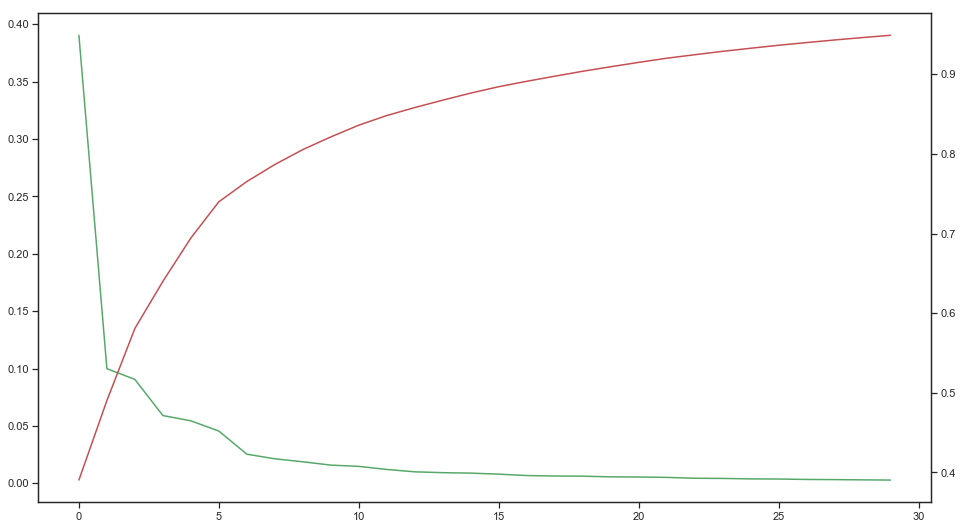

In [79]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(y1, color='g')
ax2 = ax1.twinx()
ax2.plot(np.cumsum(y1), color='r')
ax2.grid(False)
plt.show()

([<matplotlib.axis.YTick at 0x1ebf822bc88>,
 <a list of 11 Text yticklabel objects>)

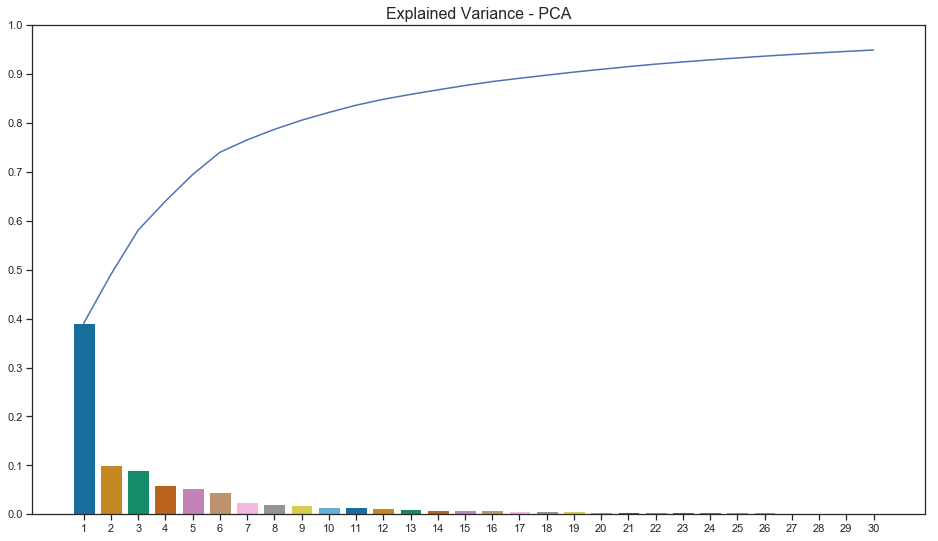

In [82]:
y1 = pca.explained_variance_ratio_
x = np.arange(1, 31)
sns.barplot(x=x, y=y1, palette="colorblind")
sns.lineplot(x=x-1, y=np.cumsum(y1))

sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
plt.title('Explained Variance - PCA', size=16)
plt.ylim(0,1)
plt.yticks(np.arange(0, 1.1, step=0.1))

# ax1.axhline(0, color="k", clip_on=False)
# ax1.set_ylabel("Sequential")

# 2

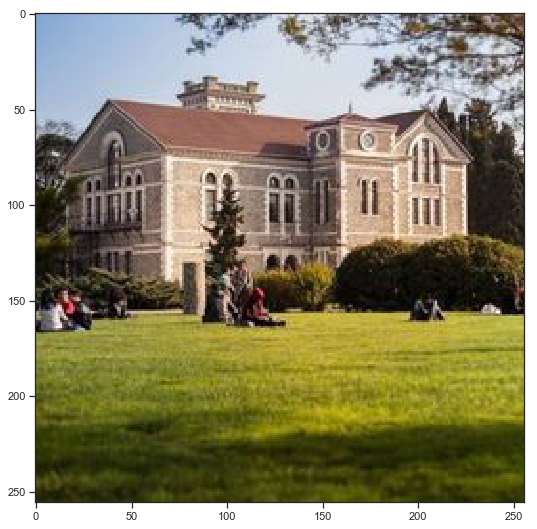

In [83]:
# Reading image and displaying
im = plt.imread('boun.jpg')
plt.imshow(im)

In [85]:
min_val, max_val = im.min(), im.max()/10
print(min_val, max_val)

0 25.5


In [102]:
noise = np.uint8(np.random.uniform(min_val, max_val, (256, 256, 3)))
noisy_im = im + noise

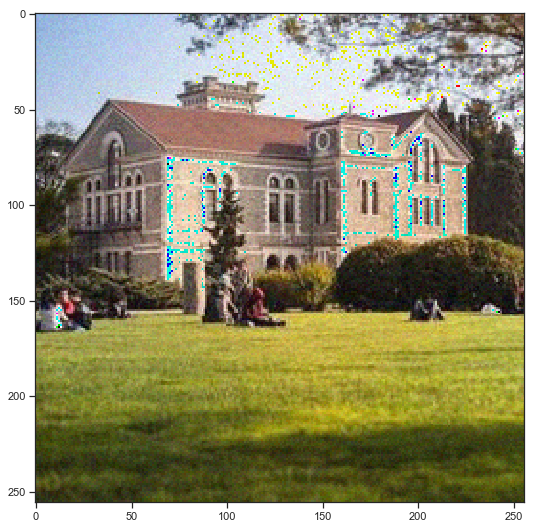

In [103]:
plt.imshow(noisy_im)

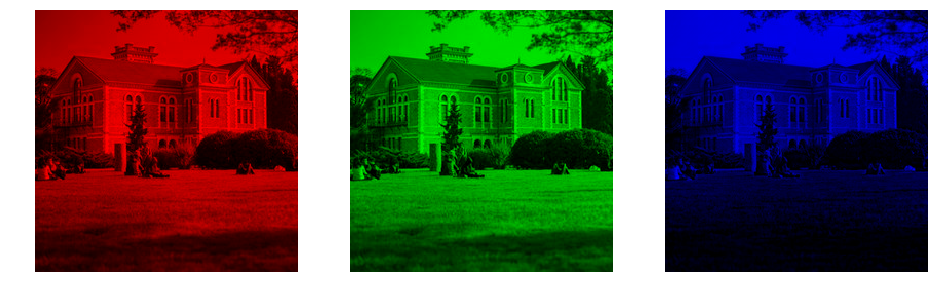

In [104]:
figure, plots = plt.subplots(ncols=3, nrows=1)
for i, subplot in zip(range(3), plots):
    temp = np.zeros(im.shape, dtype='uint8')
    temp[:,:,i] = im[:,:,i]
    subplot.imshow(temp)
    subplot.set_axis_off()
plt.show()

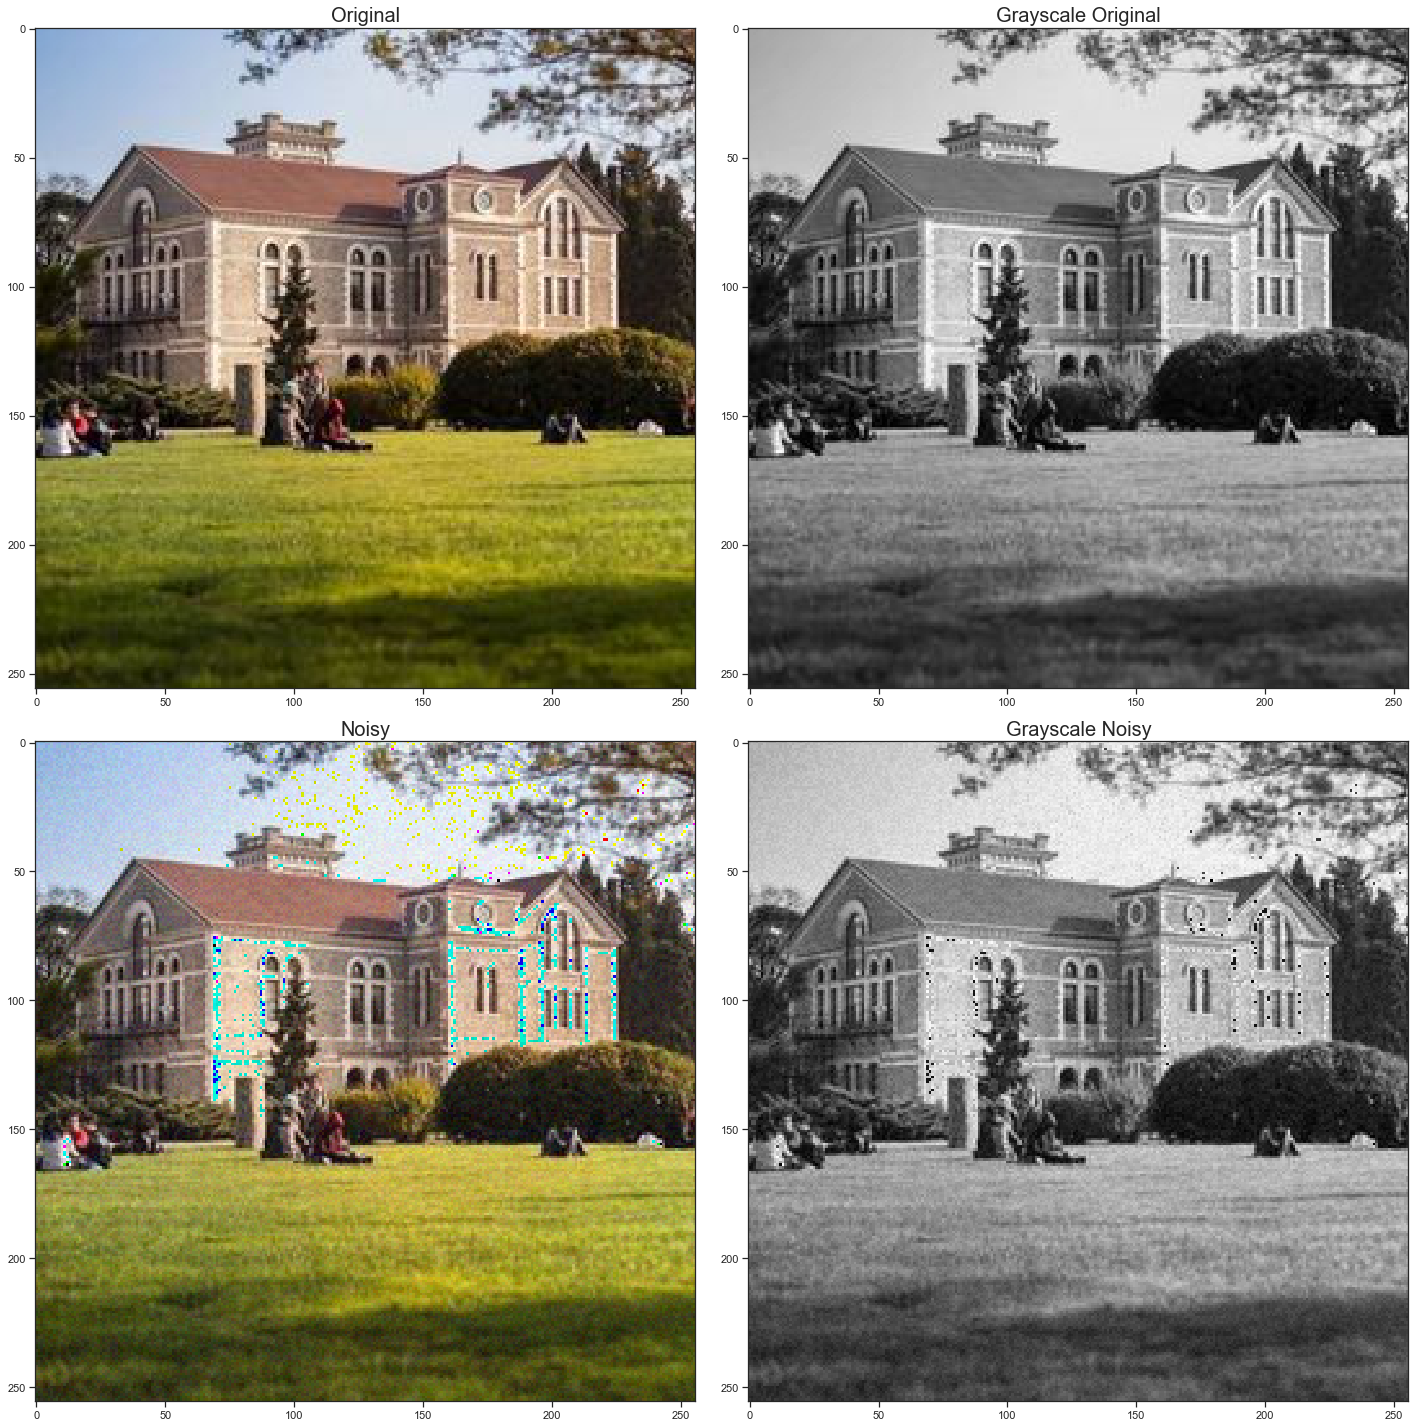

In [124]:
fig, axes = plt.subplots(2, 2, figsize=(20,20))

ax = axes.ravel()
ax[0].imshow(im)
ax[0].set_title("Original", size=20)
ax[1].imshow(rgb2gray(im), cmap=plt.cm.gray)
ax[1].set_title("Grayscale Original", size=20)
ax[2].imshow(noisy_im)
ax[2].set_title("Noisy", size=20)
ax[3].imshow(rgb2gray(noisy_im), cmap=plt.cm.gray)
ax[3].set_title("Grayscale Noisy", size=20)

fig.tight_layout()

In [125]:
gray_im = rgb2gray(noisy_im)

In [153]:
vectors = list()
for i in range(100-25):
  for j in range(100-25):
    vectors.append(gray_im[i:i+25, j:j+25].reshape(-1))
vectors = pd.DataFrame(vectors)

In [154]:
vectors 

,0,1,2,3,4,5,6,7,8,9,...,615,616,617,618,619,620,621,622,623,624
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.797197
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.797197,0.780195
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.797197,0.780195,0.799238
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.797197,0.780195,0.799238,0.791502
5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.797197,0.780195,0.799238,0.791502,0.765748
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.797197,0.780195,0.799238,0.791502,0.765748,0.763837
7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.797197,0.780195,0.799238,0.791502,0.765748,0.763837,0.777773
8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.797197,0.780195,0.799238,0.791502,0.765748,0.763837,0.777773,0.747003
9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.797197,0.780195,0.799238,0.791502,0.765748,0.763837,0.777773,0.747003,0.751551
